In [1]:
import pandas as pd
from sklearn import datasets

In [2]:
# 아이리스 데이터 셋 가져오기
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
# PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받음
# 여러 속성을 PCA로 압축하기 전에 속성값을 동일한 스케일로 변환해 주어야 함
# 표준화 (평균이 0, 분산이 1인 표준 정규 분포로 변환하기)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris.data)
scaled_data[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [4]:
scaled_data.shape

(150, 4)

In [5]:
# 4차원(4개 속성)의 붓꽃 데이터를 2차원으로 변환
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 2: 변환 차원의 수
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_data[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [6]:
pca_data.shape

(150, 2)

In [7]:
# DataFrame 만들기
df_pca = pd.DataFrame(pca_data, columns=['pca1', 'pca2'])
df_pca['target'] = iris.target
df_pca

,pca1,pca2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


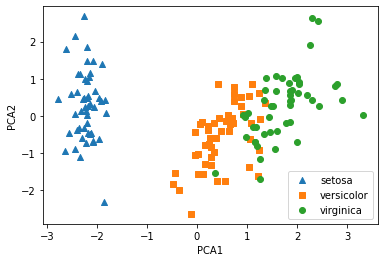

In [8]:
# 시각화하기
import matplotlib.pyplot as plt

# 가로축, 세로축 제목 표시
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# 그래프 그리기
x_data = df_pca[df_pca['target'] == 0]['pca1']
y_data = df_pca[df_pca['target'] == 0]['pca2']
plt.scatter(x_data, y_data, marker="^", label=iris.target_names[0])  # setosa

x_data = df_pca[df_pca['target'] == 1]['pca1']
y_data = df_pca[df_pca['target'] == 1]['pca2']
plt.scatter(x_data, y_data, marker="s", label=iris.target_names[1])  # versicolor

x_data = df_pca[df_pca['target'] == 2]['pca1']
y_data = df_pca[df_pca['target'] == 2]['pca2']
plt.scatter(x_data, y_data, marker="o", label=iris.target_names[2])  # virginica

plt.legend()
plt.show()

In [9]:
# PCA별 변동성 비율
# PCA1(72.9%) + PCA2(22.8%) =  95.7% (원본 데이터의 변동성을 설명)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [11]:
# 원본 데이터 모델 평가
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.2, random_state=11)

dt = DecisionTreeClassifier(random_state=11)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.9333333333333333


In [12]:
# PCA 변환 데이터 모델 평가
X_train, X_test, y_train, y_test = train_test_split(pca_data, iris.target,
                                                    test_size=0.2, random_state=11)
dt = DecisionTreeClassifier(random_state=11)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.8666666666666667
